<a href="https://colab.research.google.com/github/thinh2904/BT_Tong_Hop/blob/main/Day7_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Viết mô hình Linear Regession bằng Pytorch

Epoch [100/1000], Loss: 0.2159
Epoch [200/1000], Loss: 0.1180
Epoch [300/1000], Loss: 0.0906
Epoch [400/1000], Loss: 0.0702
Epoch [500/1000], Loss: 0.0549
Epoch [600/1000], Loss: 0.0433
Epoch [700/1000], Loss: 0.0346
Epoch [800/1000], Loss: 0.0281
Epoch [900/1000], Loss: 0.0231
Epoch [1000/1000], Loss: 0.0194


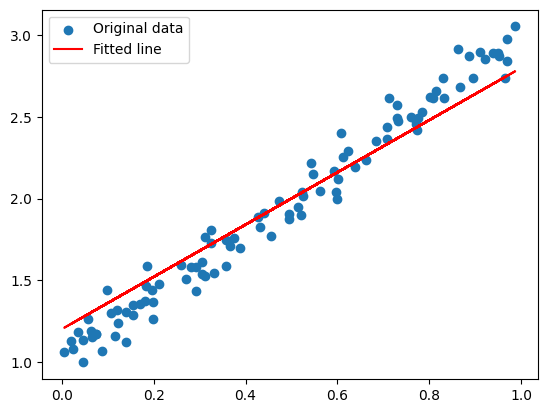

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu tự tạo
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 0.1  # Giả sử mối quan hệ là y = 2x + 1 + noise

# Chuyển dữ liệu thành tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Định nghĩa mô hình Linear Regression
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Một đầu vào và một đầu ra

    def forward(self, x):
        return self.linear(x)

# Khởi tạo mô hình và bộ tối ưu hóa
model = LinearRegression()
criterion = nn.MSELoss()  # Hàm loss: Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Sử dụng Stochastic Gradient Descent với learning rate là 0.01

# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs.squeeze(), y_tensor)  # Tính loss

    # Backward pass và cập nhật trọng số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Đồ thị dữ liệu và đường thẳng dự đoán
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, 'r-', label='Fitted line')
plt.legend()
plt.show()

In [2]:
# Dữ liệu mới cần dự đoán
new_data = np.array([[0.6]])  # Ví dụ, dữ liệu mới có giá trị là 0.6

# Chuyển dữ liệu mới thành tensor
new_data_tensor = torch.tensor(new_data, dtype=torch.float32)

# Dự đoán đầu ra cho dữ liệu mới
predicted_value = model(new_data_tensor).item()

print(f'Giá trị dự đoán cho dữ liệu mới là: {predicted_value:.4f}')

Giá trị dự đoán cho dữ liệu mới là: 2.1604


##2. Viết mô hình Logistic Regession bằng Pytorch

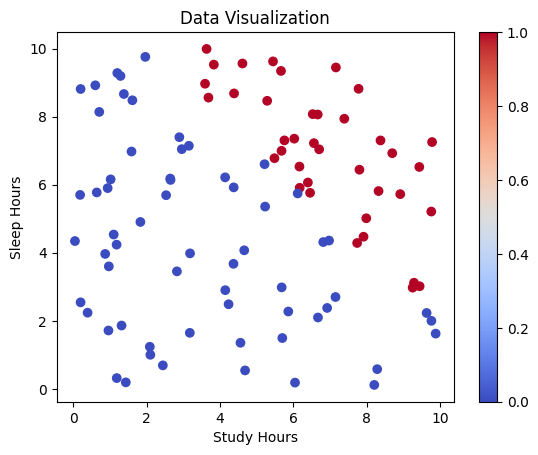

Epoch [100/1000], Loss: 0.5945
Epoch [200/1000], Loss: 0.5794
Epoch [300/1000], Loss: 0.5669
Epoch [400/1000], Loss: 0.5551
Epoch [500/1000], Loss: 0.5440
Epoch [600/1000], Loss: 0.5335
Epoch [700/1000], Loss: 0.5236
Epoch [800/1000], Loss: 0.5142
Epoch [900/1000], Loss: 0.5052
Epoch [1000/1000], Loss: 0.4968
Accuracy: 91.00%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mô phỏng
np.random.seed(0)
torch.manual_seed(0)
num_samples = 100
study_hours = np.random.uniform(0, 10, num_samples)
sleep_hours = np.random.uniform(0, 10, num_samples)
# Giả sử nếu tổng số giờ học và số giờ ngủ vượt quá một ngưỡng nào đó, học sinh sẽ đậu kỳ thi
pass_threshold = 12
passed = ((study_hours + sleep_hours) > pass_threshold).astype(float)

# Chuyển dữ liệu thành Tensor
X = np.column_stack((study_hours, sleep_hours))
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(passed, dtype=torch.float32).view(-1, 1)

# Vẽ biểu đồ dữ liệu
plt.scatter(X[:,0], X[:,1], c=passed, cmap=plt.cm.coolwarm)
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('Data Visualization')
plt.colorbar()
plt.show()

# Định nghĩa mô hình Logistic Regression
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Khởi tạo mô hình
input_dim = X.shape[1]
model = LogisticRegression(input_dim)

# Định nghĩa hàm mất mát và bộ tối ưu
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass và cập nhật trọng số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Đánh giá mô hình
with torch.no_grad():
    predicted = model(X_tensor).round()
    accuracy = (predicted == y_tensor).sum().item() / y_tensor.size(0)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

In [4]:
# Đầu vào của một ví dụ: số giờ học và số giờ ngủ
example_input = torch.tensor([[8.0, 7.0]], dtype=torch.float32)

# Sử dụng mô hình để dự đoán
with torch.no_grad():
    predicted_probability = model(example_input)
    predicted_label = predicted_probability.round()

print("Predicted Probability:", predicted_probability.item())
print("Predicted Label (Passed/Failed):", predicted_label.item())

Predicted Probability: 0.6674640774726868
Predicted Label (Passed/Failed): 1.0


##3. Viết chương trình xử lý dữ liệu sau với Pytorch(bảng giá trị cho trong file đính kèm)



In [5]:
import numpy as np

In [6]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
y = [0,1,1,0]

In [7]:
x1_ = []
x2_ = []

for item in x1:
  x1_.append(1 - item)

for item in x2:
  x2_.append(1 - item)

print(x1_)
print(x2_)

[1, 1, 0, 0]
[1, 0, 1, 0]


In [8]:
z1 = [x1[i] * x2_[i] for i in range(len(x1))]
print(z1)
z2 = [x1_[i] * x2[i] for i in range(len(x1))]
print(z2)

[0, 0, 1, 0]
[0, 1, 0, 0]


In [9]:
theta = 1.0
eta = 1.5

In [10]:
def update(w1, w2, x1, x2, y):
    i = 0
    while i < len(x1):
        y_hat = w1 * x1[i] + w2 * x2[i]
        if y_hat >= theta:
            y_hat = 1.0
        else:
            y_hat = 0.0
        if y_hat == y[i]:
            i += 1
        else:
            w1 = w1 - eta * (y_hat - y[i]) * x1[i]
            w2 = w2 - eta * (y_hat - y[i]) * x2[i]
            break
    return w1, w2

In [14]:
w11 = w21 = 1.0
w11, w21 = update(w11, w21, x1, x2_, z1)
print('w11 =',w11)
print('w21 =',w21)

w11 = 1.0
w21 = -0.5


In [15]:
w12 = w22 = 1.0
w12, w22 = update(w12, w22, x1_, x2, z2)
print('w12 =',w12)
print('w22 =',w22)

w12 = -0.5
w22 = 1.0


In [16]:
w31 = w32 = 1.0
w31, w32 = update(w31, w32, z1, z2, y)
print('w31 =',w31)
print('w32 =',w32)

w31 = 1.0
w32 = 1.0
